 # Ex5: To implement a Machine Learning Classification model using a K Nearest Neighbors Classifier algorithm and enhance the model by K Fold and GridSearchCV cross-validation.

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
#read in the data using pandas
df = pd.read_csv(r"C:\Users\Hp\Desktop\Diabeties.csv")
#check data has been read in properly
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#check number of rows and columns in dataset
df.shape

(768, 9)

In [4]:
#create a dataframe with all training data except the target column
X = df.drop(columns=['Outcome'])
#check that the target variable has been removed
X.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [5]:
#separate target values
y = df['Outcome'].values
#view target values
y[0:5]

array([1, 0, 1, 0, 1], dtype=int64)

In [6]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Split dataset into train and test data

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# Building and training the model

In [8]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [9]:
#show first 5 model predictions on the test data
knn.predict(X_test)[0:5]

array([0, 0, 0, 0, 1], dtype=int64)

In [10]:
#check accuracy of our model on the test data
knn.score(X_test, y_test)

0.6688311688311688

## k-Fold Cross-Validation

In [11]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.68181818 0.69480519 0.75324675 0.75163399 0.68627451]
cv_scores mean:0.7135557253204311


## Hypertuning model parameters using GridSearchCV

In [12]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [13]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 14}

In [14]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.7578558696205755

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the classifier to the data
knn.fit(X_train, y_train)

# Predict on the test data
y_pred = knn.predict(X_test)

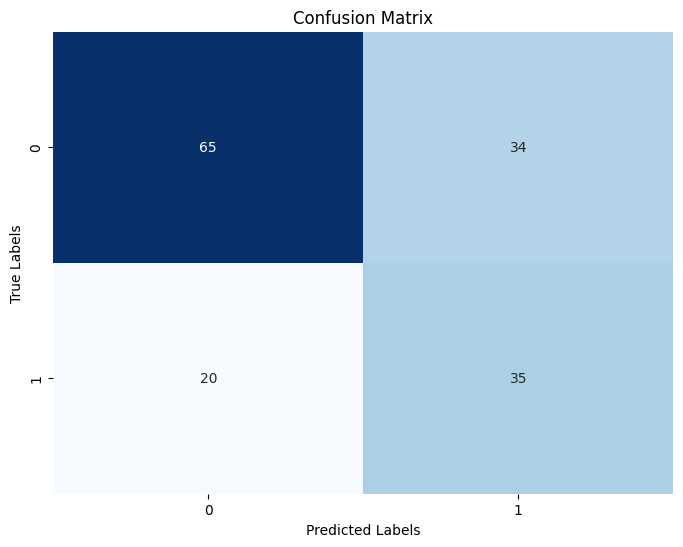

In [16]:
# Plotting confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

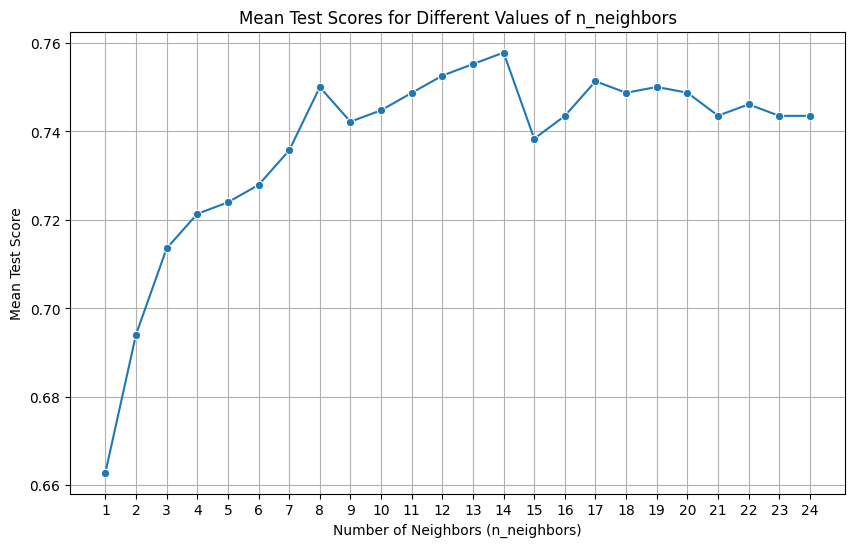

Best Parameters: {'n_neighbors': 14}
Best Score: 0.7578558696205755


In [17]:
# Extracting the results from GridSearchCV
results = knn_gscv.cv_results_
mean_scores = results['mean_test_score']
params = results['params']

# Extracting the best parameters and the best score
best_params = knn_gscv.best_params_
best_score = knn_gscv.best_score_

# Plotting mean test scores against values of n_neighbors
plt.figure(figsize=(10, 6))
sns.lineplot(x=[param['n_neighbors'] for param in params], y=mean_scores, marker='o')
plt.title('Mean Test Scores for Different Values of n_neighbors')
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Mean Test Score')
plt.xticks(np.arange(1, 25))
plt.grid(True)
plt.show()

print("Best Parameters:", best_params)
print("Best Score:", best_score)